In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)

In [280]:
data = pd.read_csv(r'docs\Propensity.csv', delimiter=',')

display(data)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,...,NaN,SI,Averia muy grave,SI,6832,12528,False,5,38,0
58045,CLI57926,K,TIPO7,FUEL 1,Alta,A,Contado,NaN,NaN,Empresa,...,Medio-Bajo,NO DATA,No,SI,0,22072,False,3,54,0
58046,CLI57952,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,0,8352,False,8,63,0
58047,CLI58038,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,No,NO,2786,10441,False,13,62,0


In [281]:
data.dtypes

CODE               object
PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [282]:
print(len(data.columns))

24


In [283]:
# Columnas de tipo object
columnas_interes_object = [
    'CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 
    'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 
]

for col in columnas_interes_object:
    print(f"-> {col}: {data[col].unique()}")
    


-> CODE: ['CLI1' 'CLI2' 'CLI3' ... 'CLI57952' 'CLI58038' 'CLI58048']
-> PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
-> TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
-> COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
-> Potencia: ['Baja' 'Media' 'Alta']
-> TRANS: ['M' 'A']
-> FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
-> ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA' nan]
-> GENERO: ['M' 'F' nan]
-> OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
-> PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'P

In [284]:
# Columnas de tipo int64 y bool
columnas_interes_numericas = [
    'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo', 'Mas_1_coche'
]

for col in columnas_interes_numericas:
    print(f"-> {col}: {data[col].unique()}")


-> Campanna2: ['NO' 'SI']
-> Campanna3: ['NO' 'SI']
-> Zona_Renta: ['Medio-Bajo' 'Medio' 'Alto' nan 'Otros']
-> REV_Garantia: ['NO DATA' 'SI']
-> Averia_grave: ['Averia muy grave' 'No' 'Averia leve' 'Averia grave' nan]
-> QUEJA_CAC: ['SI' 'NO']
-> COSTE_VENTA: [2892 1376 2015 ... 2278 4655 7151]
-> km_anno: [    0  7187  7256 ...  3787  9219 10441]
-> Revisiones: [ 2  4  3  1  0  7  6  5  8 10  9 12 11 13]
-> Edad_Cliente: [18 53 21 48 56 24 51 44 20 32 52 55 27 26 54 38 46 37 31 45 23 49 57 30
 39 19 29 60 28 25 58 22 50 42 47 62 61 59 41 40 43 64 68 67 69 70 35 71
 34 66 63 33 65 36]
-> Tiempo: [ 0  3  5  4  8  7  6  9  2 10 13 11 14 12]
-> Mas_1_coche: [False  True]


In [285]:
data.describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,2540.125756,11805.893607,3.529587,47.351255,1.859119
std,1603.556511,10205.363971,2.528413,11.239984,3.091309
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11486.000000,3.000000,48.000000,0.000000
75%,3301.000000,17927.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


---

In [286]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que 'data' es tu DataFrame original

# Lista de columnas ordinales para Label Encoding
label_columns = ['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'ESTADO_CIVIL', 'OcupaciOn', 'PROVINCIA', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo']  

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Primero, ordenar la columna 'Revisiones' de 0 a 14
revisiones_order = [str(i) for i in range(15)]  # Esto crea una lista de '0', '1', '2', ..., '14'
le.fit(revisiones_order)  # Ajustamos el LabelEncoder para que siga este orden específico
data['Revisiones'] = le.transform(data['Revisiones'].astype(str))  # Aplicamos el encoding a 'Revisiones'

# Aplicar Label Encoding a las demás columnas
for col in label_columns:
    if col != 'Revisiones':  # No queremos volver a codificar 'Revisiones'
        data[col] = le.fit_transform(data[col])  

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

    CODE  PRODUCTO  TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS  \
0      0         0                0      FUEL 1     Baja     M   
1  11111         0                0      FUEL 1     Baja     M   
2  22222         0                0      FUEL 1     Baja     M   
3  33333         0                0      FUEL 1     Baja     M   
4  44444         0                0      FUEL 1     Baja     M   

         FORMA_PAGO  ESTADO_CIVIL GENERO  OcupaciOn  ...  Zona_Renta  \
0           Contado             0      M          1  ...  Medio-Bajo   
1           Contado             0      F          1  ...  Medio-Bajo   
2             Otros             0      M          1  ...       Medio   
3  Financiera Marca             0      F          1  ...       Medio   
4  Financiera Marca             0      F          2  ...        Alto   

  REV_Garantia      Averia_grave QUEJA_CAC COSTE_VENTA km_anno Mas_1_coche  \
0      NO DATA  Averia muy grave        SI        1010       0       False   
1           SI

In [287]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame original

# Función personalizada para 'Mas_1_coche', 'REV_Garantia' y 'QUEJA_CAC'
def custom_encoder(val, column_name):
    if column_name == 'Mas_1_coche':
        # Si el valor es 'True', asignamos 1, si no 0
        return 1 if val == 'True' else 0
    elif column_name == 'REV_Garantia':
        # Si el valor es 'SI', asignamos 1, si no 0
        return 1 if val == 'SI' else 0
    elif column_name == 'QUEJA_CAC':
        # Si el valor es 'SI', asignamos 0, si no 1
        return 0 if val == 'SI' else 1
    elif column_name == 'Campanna1':
        # Si el valor es 'True', asignamos 1, si no 0
        return 1 if val == 'SI' else 1
    elif column_name == 'Campanna2':
        # Si el valor es 'True', asignamos 1, si no 0
        return 1 if val == 'SI' else 1
    elif column_name == 'Campanna3':
        # Si el valor es 'True', asignamos 1, si no 0
        return 1 if val == 'SI' else 1
    # Para otras columnas, devolvemos el valor sin cambios
    return val

# Codificación personalizada para las columnas 'Mas_1_coche', 'REV_Garantia' y 'QUEJA_CAC'
for col in ['Mas_1_coche', 'REV_Garantia', 'QUEJA_CAC', 'Campanna1', 'Campanna2', 'Campanna3']:
    data[col] = data[col].apply(lambda x: custom_encoder(x, col))

# Lista de otras columnas para las que aplicamos One-Hot Encoding estándar
one_hot_columns = ['FORMA_PAGO', 'COMBUSTIBLE', 'GENERO', 'TRANS']

# Aplicar One-Hot Encoding a las demás columnas
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)  # drop_first=True para evitar la multicolinealidad

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

    CODE  PRODUCTO  TIPO_CARROCERIA Potencia  ESTADO_CIVIL  OcupaciOn  \
0      0         0                0     Baja             0          1   
1  11111         0                0     Baja             0          1   
2  22222         0                0     Baja             0          1   
3  33333         0                0     Baja             0          1   
4  44444         0                0     Baja             0          2   

   PROVINCIA  Campanna1  Campanna2  Campanna3  ... Mas_1_coche  Revisiones  \
0          4          1          1          1  ...           0           7   
1         47          1          1          1  ...           0           7   
2         30          1          1          1  ...           0           9   
3         32          1          1          1  ...           0           9   
4         41          1          1          1  ...           0           8   

  Edad_Cliente  Tiempo  FORMA_PAGO_Financiera Banco  \
0            0       0               

In [288]:
# Columnas de tipo int64 y bool
columnas_interes_numericas = [
    'Potencia'
]

for col in columnas_interes_numericas:
    print(f"-> {col}: {data[col].unique()}")

-> Potencia: ['Baja' 'Media' 'Alta']


In [289]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame original

# Definir las columnas ordinales y sus categorías con el orden que deseas
ordinal_columns = {
    'Potencia': {'Baja': 0, 'Media': 1, 'Alta': 2},    
    'OcupaciOn': {'Autonomo': 0, 'Funcionario': 1, 'Empresa': 2},
}

# Aplicar el mapeo manual a las columnas especificadas
for col, mapping in ordinal_columns.items():
    data[col] = data[col].map(mapping)  # Usar el mapeo para convertir las categorías a números

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


    CODE  PRODUCTO  TIPO_CARROCERIA  Potencia  ESTADO_CIVIL  OcupaciOn  \
0      0         0                0         0             0        NaN   
1  11111         0                0         0             0        NaN   
2  22222         0                0         0             0        NaN   
3  33333         0                0         0             0        NaN   
4  44444         0                0         0             0        NaN   

   PROVINCIA  Campanna1  Campanna2  Campanna3  ... Mas_1_coche  Revisiones  \
0          4          1          1          1  ...           0           7   
1         47          1          1          1  ...           0           7   
2         30          1          1          1  ...           0           9   
3         32          1          1          1  ...           0           9   
4         41          1          1          1  ...           0           8   

  Edad_Cliente  Tiempo  FORMA_PAGO_Financiera Banco  \
0            0       0         

---

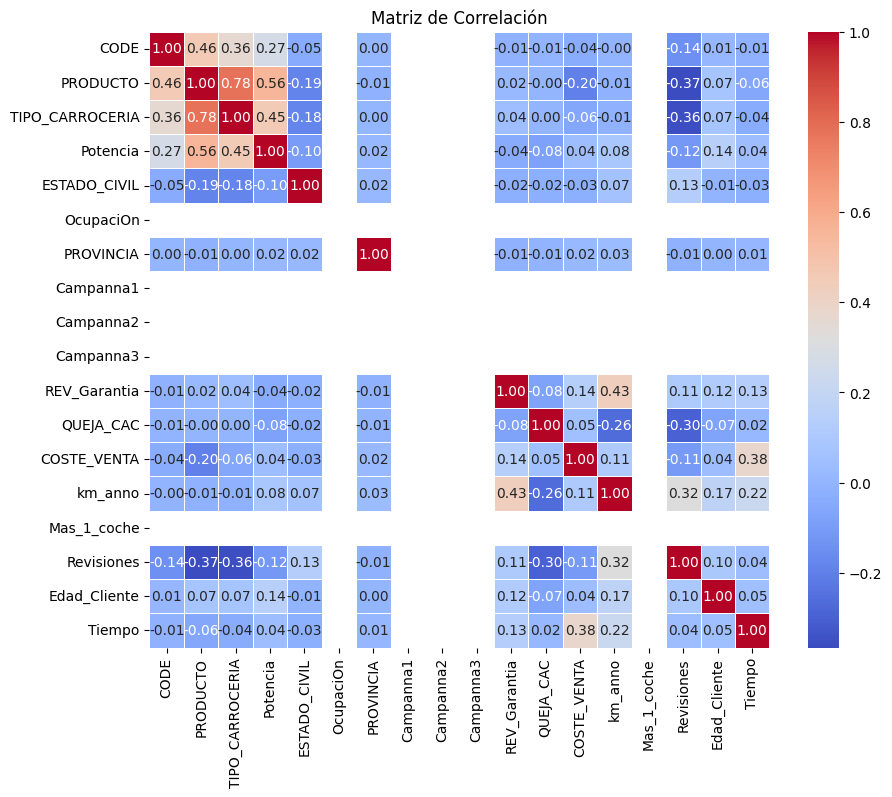

In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

---

In [291]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Supongamos que 'data' es tu DataFrame original

# 1. Rellenar los valores NaN y 'Otros' de 'Zona_Renta' con regresión lineal

# Primero, reemplazamos 'Otros' por NaN en 'Zona_Renta'
data['Zona_Renta'] = data['Zona_Renta'].replace('Otros', pd.NA)

# Filtrar las filas que no tienen NaN en 'Zona_Renta' para entrenar el modelo
train_data_zona_renta = data[data['Zona_Renta'].notna()]

# Usar todas las columnas (excepto 'Zona_Renta') como características para predecir 'Zona_Renta'
X_train_zona_renta = train_data_zona_renta.drop(columns=['Zona_Renta', 'Averia_grave', 'ESTADO_CIVIL'])  # Características
y_train_zona_renta = train_data_zona_renta['Zona_Renta']  # Variable dependiente

# Convertir la variable dependiente a valores numéricos usando OrdinalEncoder
encoder = OrdinalEncoder()
y_train_zona_renta = encoder.fit_transform(y_train_zona_renta.values.reshape(-1, 1))  # Convertir a numérico

# Imputar los valores faltantes en las características (X)
# Usamos 'most_frequent' para columnas categóricas y 'mean' para numéricas
imputer = SimpleImputer(strategy='most_frequent')  # Para columnas categóricas
X_train_zona_renta_imputed = imputer.fit_transform(X_train_zona_renta)

# Entrenar el modelo de regresión lineal para 'Zona_Renta'
model_zona_renta = LinearRegression()
model_zona_renta.fit(X_train_zona_renta_imputed, y_train_zona_renta)

# Predecir los valores faltantes de 'Zona_Renta' (incluyendo los NaN y 'Otros')
test_data_zona_renta = data[data['Zona_Renta'].isna()]  # Filtrar las filas con NaN en 'Zona_Renta'
X_test_zona_renta = test_data_zona_renta.drop(columns=['Zona_Renta', 'Averia_grave', 'ESTADO_CIVIL'])  # Características

# Imputar los valores faltantes en las características de prueba
X_test_zona_renta_imputed = imputer.transform(X_test_zona_renta)

# Predecir los valores de 'Zona_Renta' faltantes
predicted_zona_renta = model_zona_renta.predict(X_test_zona_renta_imputed)

# Rellenar los valores faltantes de 'Zona_Renta'
data.loc[data['Zona_Renta'].isna(), 'Zona_Renta'] = encoder.inverse_transform(predicted_zona_renta.reshape(-1, 1))


# 2. Rellenar los valores NaN de 'Averia_grave' con regresión lineal

# Filtrar las filas que no tienen NaN en 'Averia_grave' para entrenar el modelo
train_data_averia = data[data['Averia_grave'].notna()]

# Usar todas las columnas (excepto 'Averia_grave') como características para predecir 'Averia_grave'
X_train_averia = train_data_averia.drop(columns=['Averia_grave', 'ESTADO_CIVIL'])  # Características
y_train_averia = train_data_averia['Averia_grave']  # Variable dependiente

# Convertir la variable dependiente a valores numéricos usando OrdinalEncoder
y_train_averia = encoder.fit_transform(y_train_averia.values.reshape(-1, 1))  # Convertir a numérico

# Imputar los valores faltantes en las características (X) para 'Averia_grave'
X_train_averia_imputed = imputer.fit_transform(X_train_averia)

# Entrenar el modelo de regresión lineal para 'Averia_grave'
model_averia = LinearRegression()
model_averia.fit(X_train_averia_imputed, y_train_averia)

# Predecir los valores faltantes de 'Averia_grave'
test_data_averia = data[data['Averia_grave'].isna()]  # Filtrar las filas con NaN en 'Averia_grave'
X_test_averia = test_data_averia.drop(columns=['Averia_grave', 'ESTADO_CIVIL'])  # Características

# Imputar los valores faltantes en las características de prueba
X_test_averia_imputed = imputer.transform(X_test_averia)

# Predecir los valores de 'Averia_grave' faltantes
predicted_averia_grave = model_averia.predict(X_test_averia_imputed)

# Rellenar los valores faltantes de 'Averia_grave'
data.loc[data['Averia_grave'].isna(), 'Averia_grave'] = predicted_averia_grave


# 3. Rellenar los valores NaN de 'ESTADO_CIVIL' con regresión lineal

# Filtrar las filas que no tienen NaN en 'ESTADO_CIVIL' para entrenar el modelo
train_data_estado_civil = data[data['ESTADO_CIVIL'].notna()]

# Usar todas las columnas (excepto 'ESTADO_CIVIL') como características para predecir 'ESTADO_CIVIL'
X_train_estado_civil = train_data_estado_civil.drop(columns=['ESTADO_CIVIL', 'Zona_Renta', 'Averia_grave'])  # Características
y_train_estado_civil = train_data_estado_civil['ESTADO_CIVIL']  # Variable dependiente

# Convertir la variable dependiente a valores numéricos usando OrdinalEncoder
y_train_estado_civil = encoder.fit_transform(y_train_estado_civil.values.reshape(-1, 1))  # Convertir a numérico

# Imputar los valores faltantes en las características (X) para 'ESTADO_CIVIL'
X_train_estado_civil_imputed = imputer.fit_transform(X_train_estado_civil)

# Entrenar el modelo de regresión lineal para 'ESTADO_CIVIL'
model_estado_civil = LinearRegression()
model_estado_civil.fit(X_train_estado_civil_imputed, y_train_estado_civil)

# Predecir los valores faltantes de 'ESTADO_CIVIL'
test_data_estado_civil = data[data['ESTADO_CIVIL'].isna()]  # Filtrar las filas con NaN en 'ESTADO_CIVIL'
X_test_estado_civil = test_data_estado_civil.drop(columns=['ESTADO_CIVIL', 'Zona_Renta', 'Averia_grave'])  # Características

# Imputar los valores faltantes en las características de prueba
X_test_estado_civil_imputed = imputer.transform(X_test_estado_civil)

# Predecir los valores de 'ESTADO_CIVIL' faltantes
predicted_estado_civil = model_estado_civil.predict(X_test_estado_civil_imputed)

# Rellenar los valores faltantes de 'ESTADO_CIVIL'
data.loc[data['ESTADO_CIVIL'].isna(), 'ESTADO_CIVIL'] = encoder.inverse_transform(predicted_estado_civil.reshape(-1, 1))


# Mostrar el DataFrame con las columnas completadas
print(data.head())


c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['OcupaciOn']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['OcupaciOn']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['OcupaciOn']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


ValueError: could not convert string to float: 'Medio-Bajo'

In [ ]:
# Columnas de tipo int64 y bool
columnas_interes_numericas = [
    'Zona_Renta', 'Averia_grave', 'ESTADO_CIVIL'
]

for col in columnas_interes_numericas:
    print(f"-> {col}: {data[col].unique()}")

---

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que 'data' es tu DataFrame original

# Lista de columnas ordinales para Label Encoding
label_columns = ['ESTADO_CIVIL']  

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Primero, ordenar la columna 'Revisiones' de 0 a 14
revisiones_order = [str(i) for i in range(15)]  # Esto crea una lista de '0', '1', '2', ..., '14'
le.fit(revisiones_order)  # Ajustamos el LabelEncoder para que siga este orden específico
data['Revisiones'] = le.transform(data['Revisiones'].astype(str))  # Aplicamos el encoding a 'Revisiones'

# Aplicar Label Encoding a las demás columnas
for col in label_columns:
    if col != 'Revisiones':  # No queremos volver a codificar 'Revisiones'
        data[col] = le.fit_transform(data[col])  

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

In [ ]:
# Definir las columnas ordinales y sus categorías con el orden que deseas
ordinal_columns = {
    'Averia_grave': ['Desconocido', 'Averia muy grave', 'Averia grave', 'Averia leve', 'No'],  
    'Zona_Renta': ['Medio-Bajo' 'Medio' 'Alto']
}

# Crear un objeto OrdinalEncoder
ord_enc = OrdinalEncoder(categories='auto')  # Esto permite especificar el orden

# Aplicar Ordinal Encoding a las columnas con un orden específico
for col, categories in ordinal_columns.items():
    # Asignar el orden de las categorías como en 'ordinal_columns'
    ord_enc.categories = [categories]
    data[col] = ord_enc.fit_transform(data[[col]])  # Actualizar directamente la columna con el encoding

# Mostrar el DataFrame con las columnas codificadas
print(data.head())